<a href="https://colab.research.google.com/github/ridmikaw/DL-Lab-02-IT22088246/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [3]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [3 9 2 7 4 9 3 8 2 3]


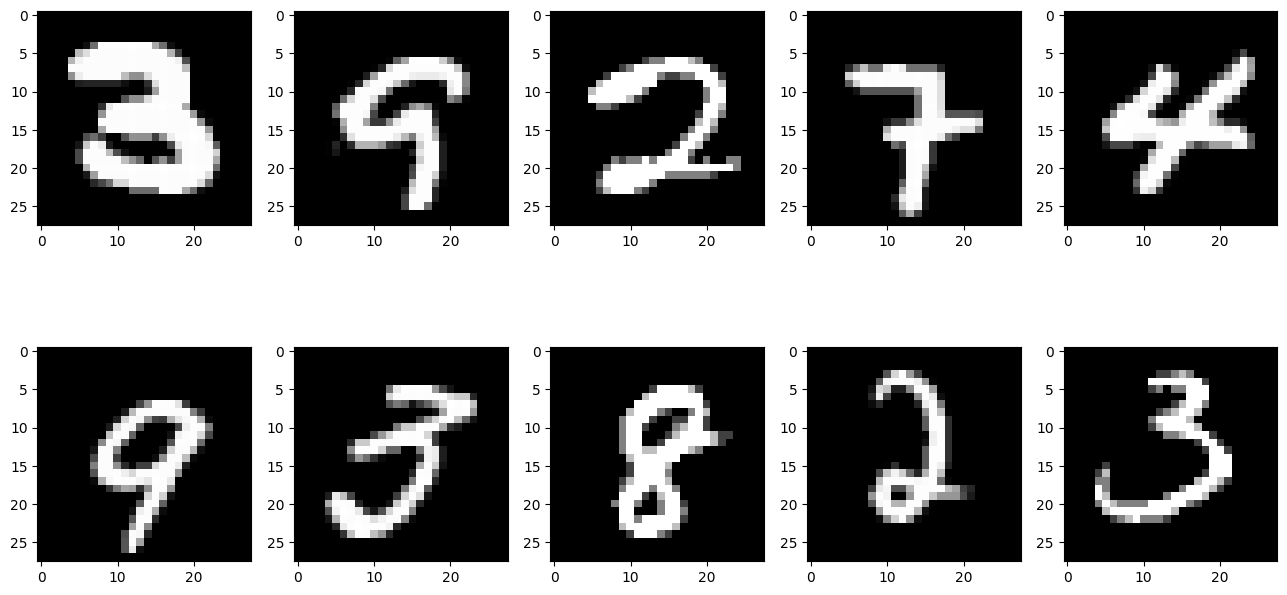

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [5]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

# Create the Model architecture

In [16]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# Hidden layer with L2 regularization
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)))

# Hidden layer with L1 + L2 regularization
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

# Output layer
model.add(Dense(10, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [15]:
# Try more epochs, batch_size, and learning_rate
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),   # tuned learning rate
              metrics=['accuracy'])

train_info = model.fit(new_train_data , new_train_target ,
                       epochs=20,       # increase epochs (try 20–30)
                       batch_size=128,  # tune batch size
                       validation_data=(new_test_data, new_test_target),
                       verbose=2)


Epoch 1/20
469/469 - 10s - 22ms/step - accuracy: 0.8649 - loss: 0.9387 - val_accuracy: 0.9557 - val_loss: 0.5448
Epoch 2/20
469/469 - 5s - 11ms/step - accuracy: 0.9393 - loss: 0.5460 - val_accuracy: 0.9633 - val_loss: 0.4027
Epoch 3/20
469/469 - 7s - 14ms/step - accuracy: 0.9512 - loss: 0.4096 - val_accuracy: 0.9708 - val_loss: 0.3056
Epoch 4/20
469/469 - 5s - 11ms/step - accuracy: 0.9556 - loss: 0.3380 - val_accuracy: 0.9705 - val_loss: 0.2723
Epoch 5/20
469/469 - 6s - 14ms/step - accuracy: 0.9599 - loss: 0.2992 - val_accuracy: 0.9755 - val_loss: 0.2421
Epoch 6/20
469/469 - 6s - 12ms/step - accuracy: 0.9622 - loss: 0.2727 - val_accuracy: 0.9737 - val_loss: 0.2214
Epoch 7/20
469/469 - 11s - 24ms/step - accuracy: 0.9617 - loss: 0.2652 - val_accuracy: 0.9719 - val_loss: 0.2322
Epoch 8/20
469/469 - 10s - 22ms/step - accuracy: 0.9647 - loss: 0.2506 - val_accuracy: 0.9733 - val_loss: 0.2182
Epoch 9/20
469/469 - 6s - 12ms/step - accuracy: 0.9657 - loss: 0.2473 - val_accuracy: 0.9736 - val_lo

Plot the loss and accuracy graphs

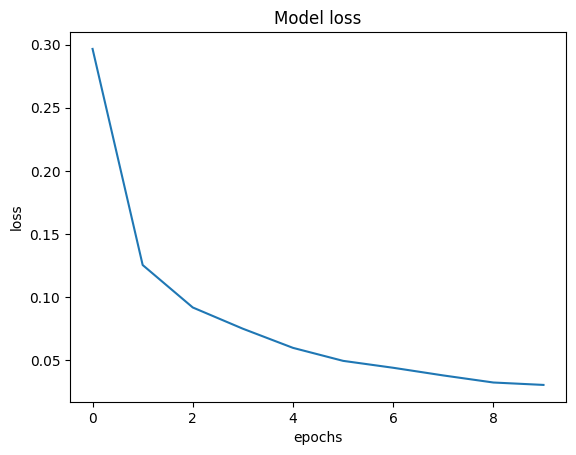

In [9]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

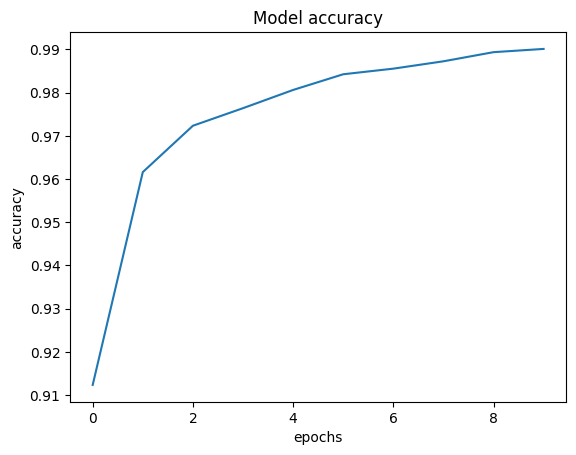

In [10]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [11]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1356
Loss of the Test dataset is: 0.11147858947515488
Accuracy of the test dataset is: 0.9728999733924866


Save the model weights

In [13]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_V1.h5